# Diamonds price prediction

*Task : Predict diamonds price*

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
#import data
data = pd.read_csv('./data/diamonds.csv')
data.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

# EDA (Exploratory Data Analysis)

In [3]:
data.shape

(53940, 10)

*notre Dataset contient 53940 lines et 10 colonnes*

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [7]:
data.isnull().sum()/data.shape[0]

carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
price      0.0
x          0.0
y          0.0
z          0.0
dtype: float64

Le dataset ne contient pas de valeurs manquantes

In [8]:
data.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [18]:
data.groupby('color')['price'].describe()

count         mean          std    min     25%     50%      75%  \
color                                                                      
D       6775.0  3169.954096  3356.590935  357.0   911.0  1838.0  4213.50   
E       9797.0  3076.752475  3344.158685  326.0   882.0  1739.0  4003.00   
F       9542.0  3724.886397  3784.992007  342.0   982.0  2343.5  4868.25   
G      11292.0  3999.135671  4051.102846  354.0   931.0  2242.0  6048.00   
H       8304.0  4486.669196  4215.944171  337.0   984.0  3460.0  5980.25   
I       5422.0  5091.874954  4722.387604  334.0  1120.5  3730.0  7201.75   
J       2808.0  5323.818020  4438.187251  335.0  1860.5  4234.0  7695.00   

           max  
color           
D      18693.0  
E      18731.0  
F      18791.0  
G      18818.0  
H      18803.0  
I      18823.0  
J      18710.0

In [4]:
target = 'price'

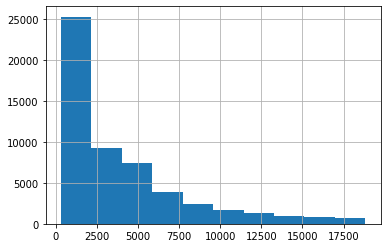

In [30]:
data.price.hist(bins=10)

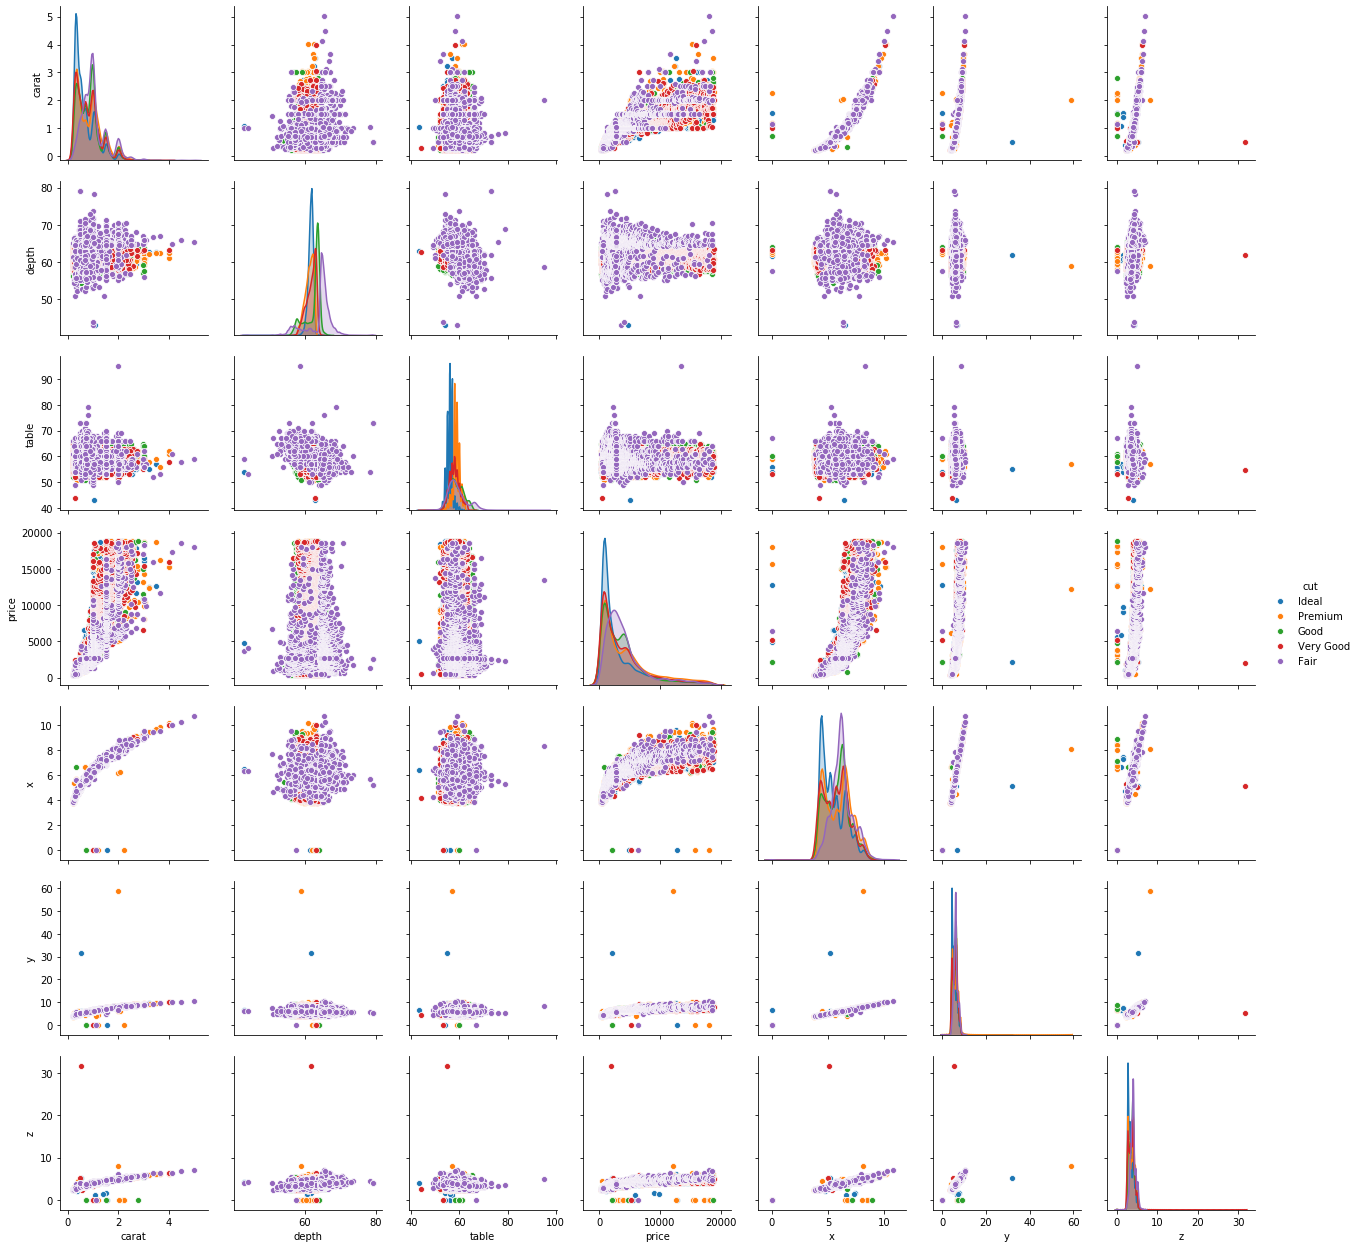

In [9]:
sns.pairplot(data=data, hue='cut')

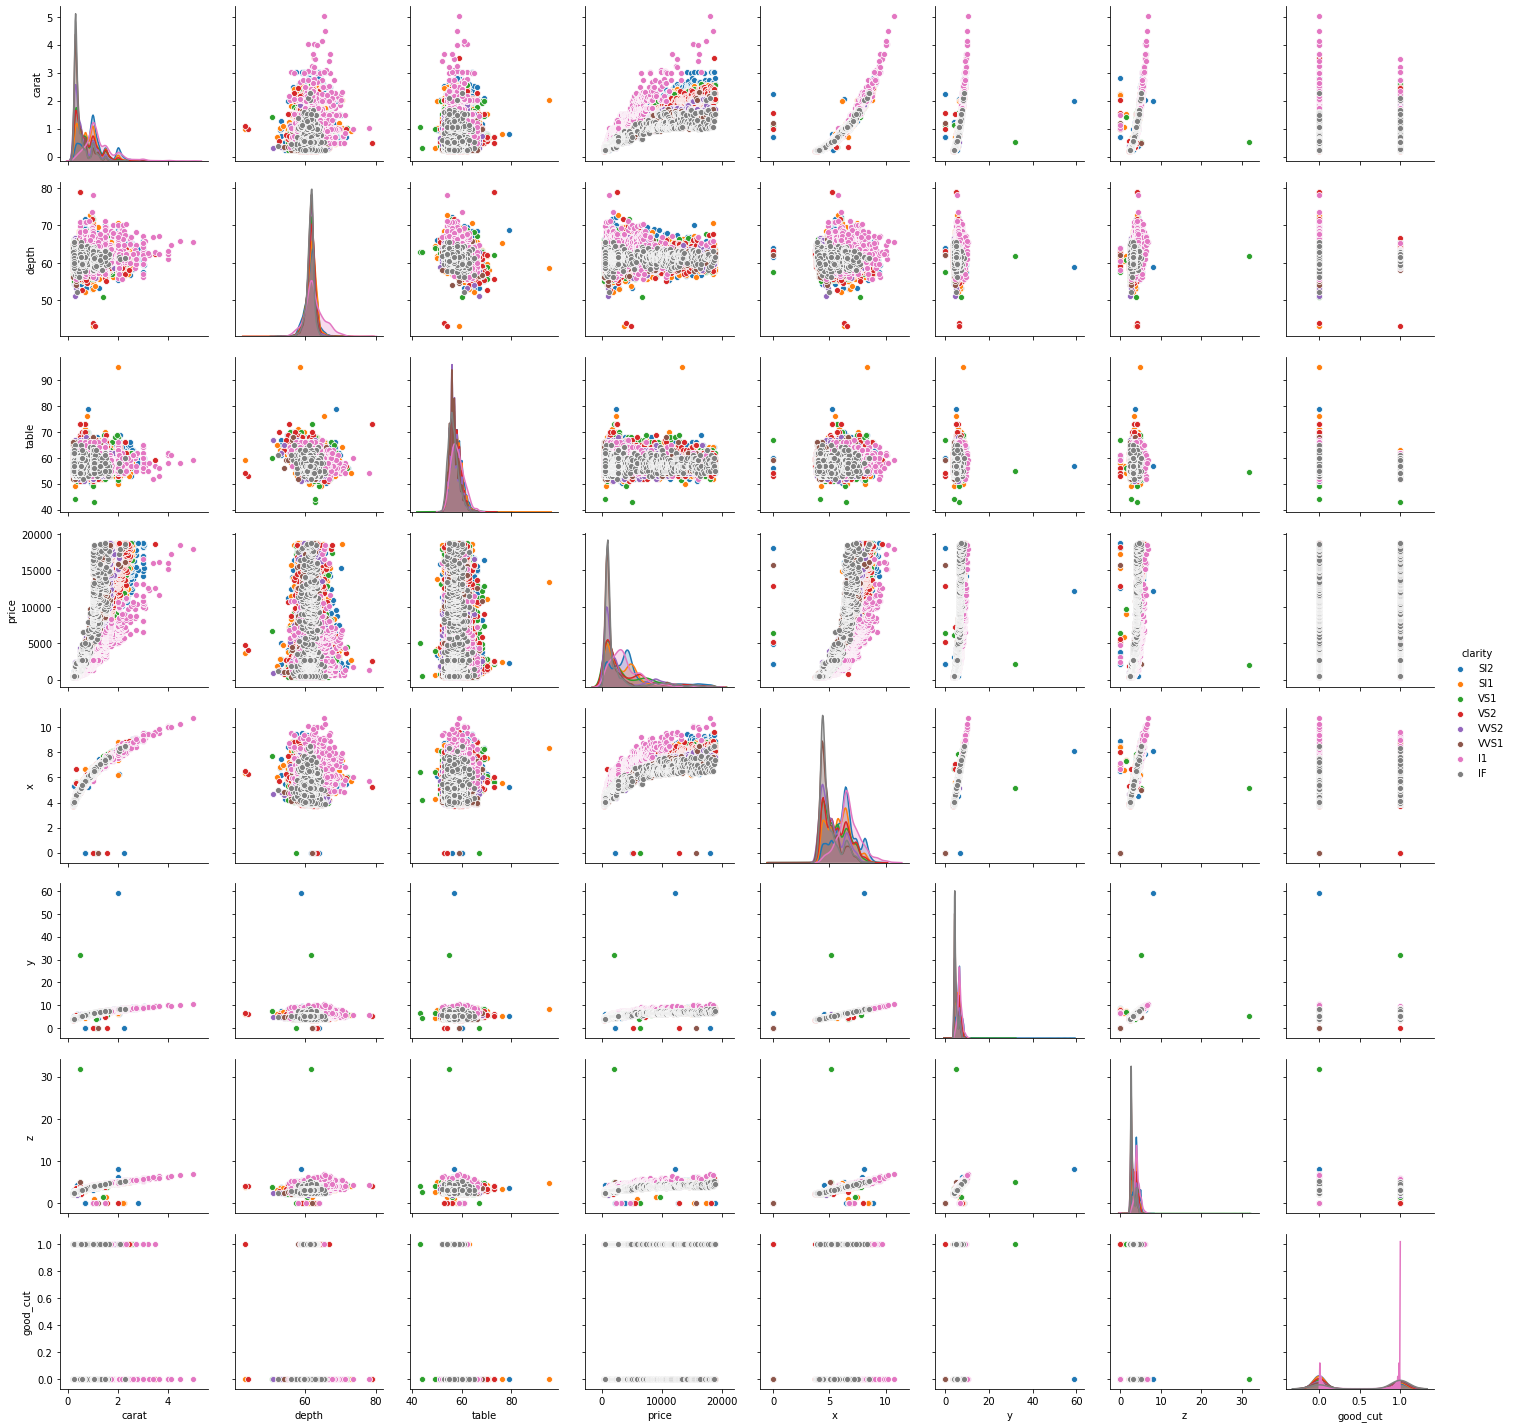

In [68]:
sns.pairplot(data=data, hue='clarity')

## Variables Numeriques

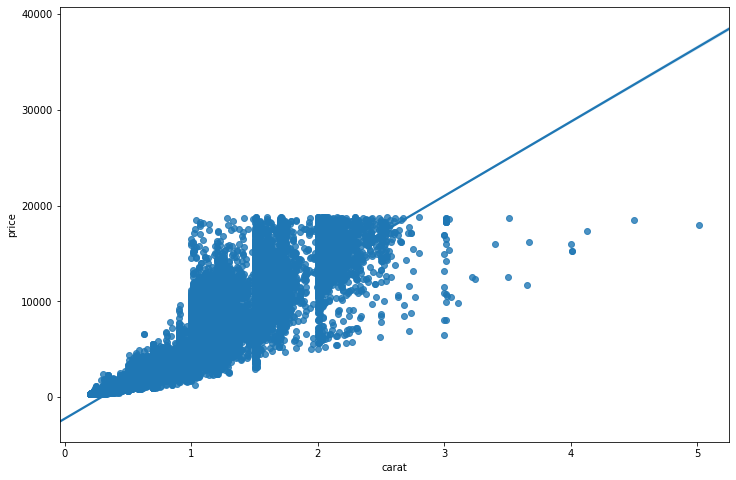

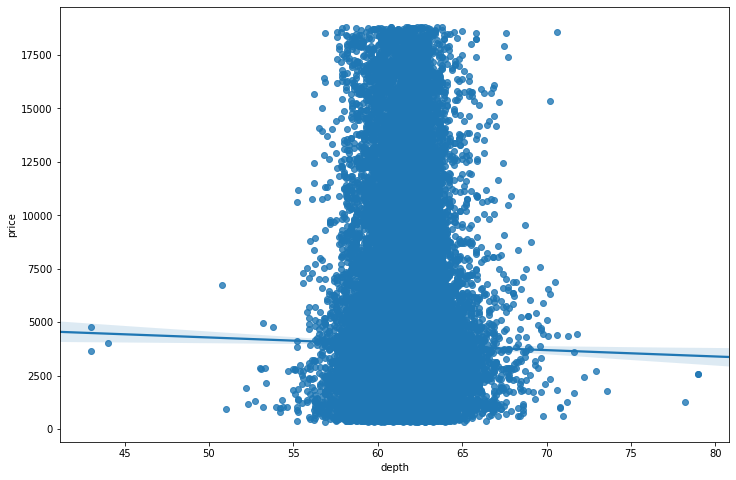

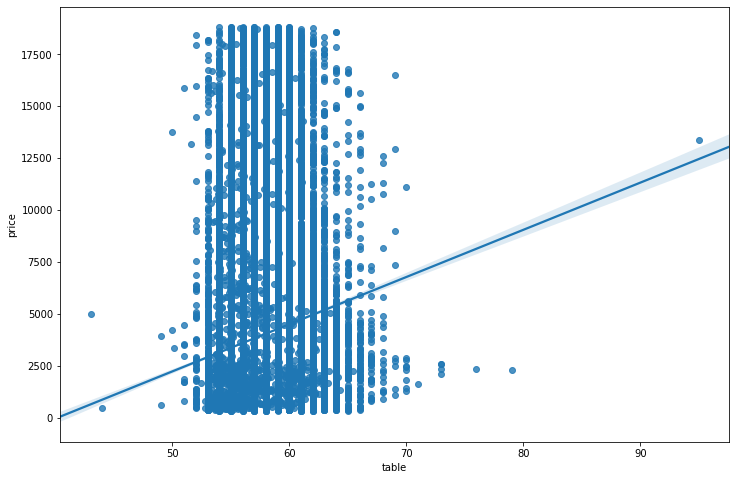

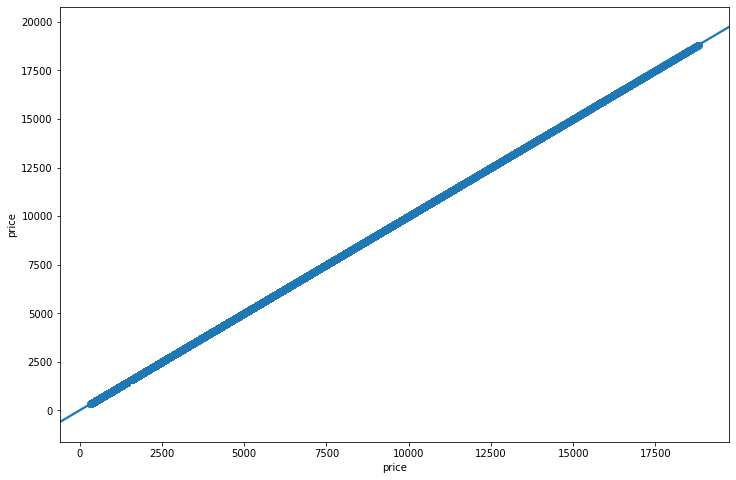

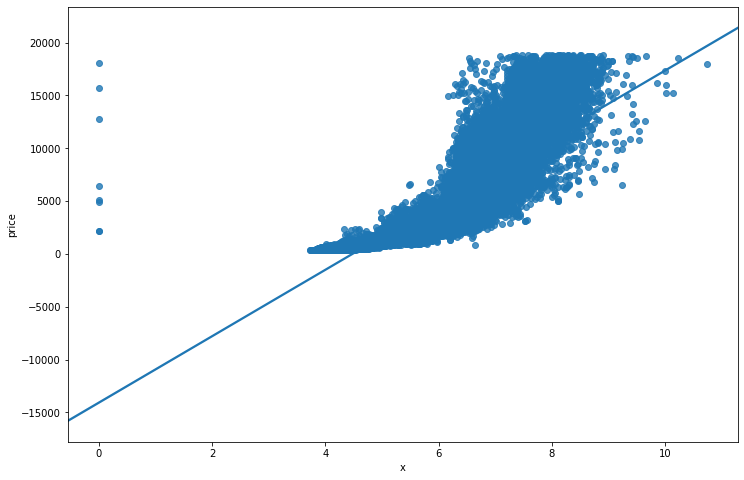

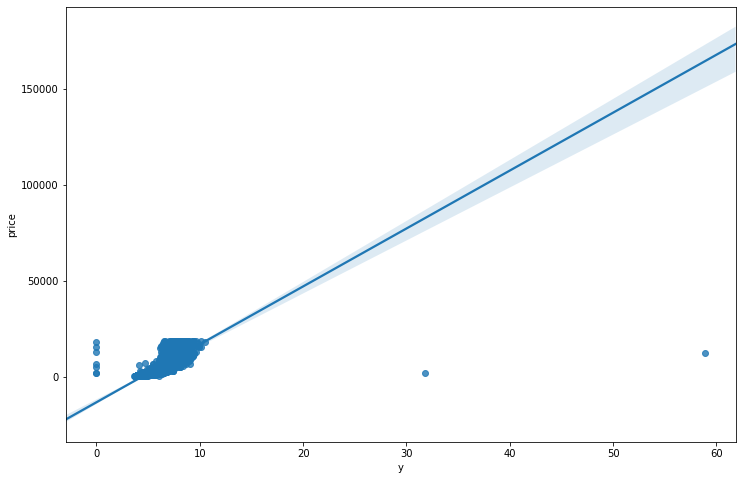

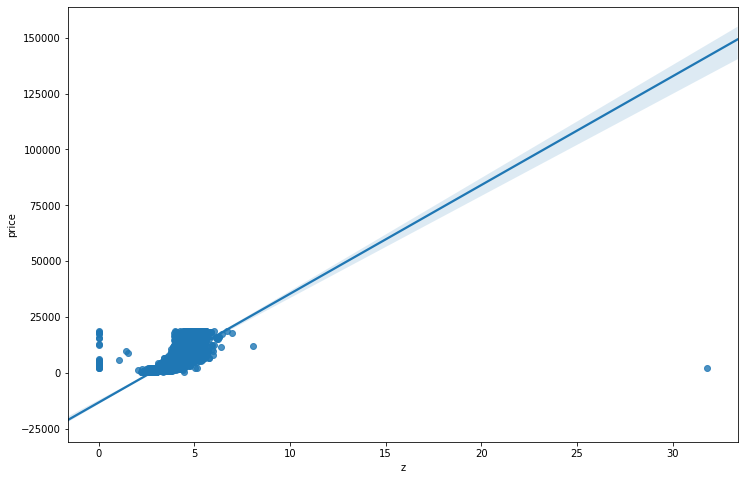

In [12]:
for col in data.select_dtypes(include=[np.number]):
    plt.figure(figsize=(12,8))
    sns.regplot(data=data, x = f'{col}', y=target)

*Remarque*
- nos variables numeriques contiennent beaucoup de outliers ( carat, depth,x, y, z)
- on peut voir que la target variables (price) est très correlé avec  carat, x, y,z variables

# suppression des outliers

In [5]:
def detect_outliers(data):
    data = data[data['x'] > 0]
    data = data[data['y'] < 20]
    data = data[data['z'] < 10]
    data = data[data["z"] > 1.8]
    data = data[data['table'] > 50]
    data = data[data['table'] < 70]
    data = data[data['depth'] > 54]
    data = data[data['depth'] < 70]
    data = data[data['carat'] < 3.3]
    return data

In [6]:
data = detect_outliers(data=data)

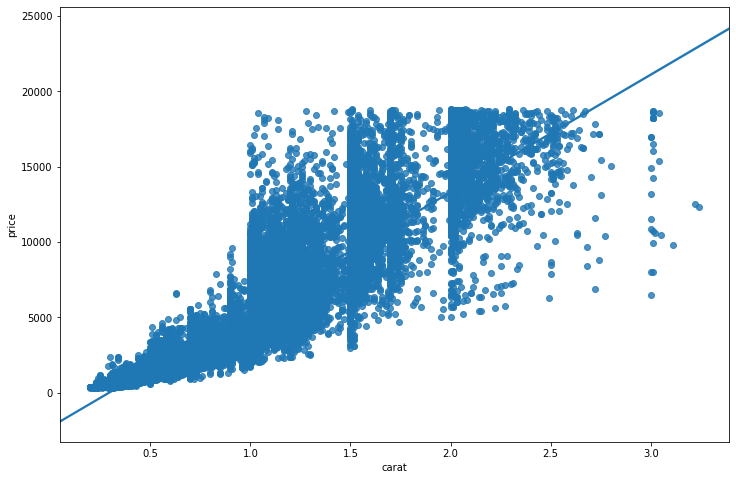

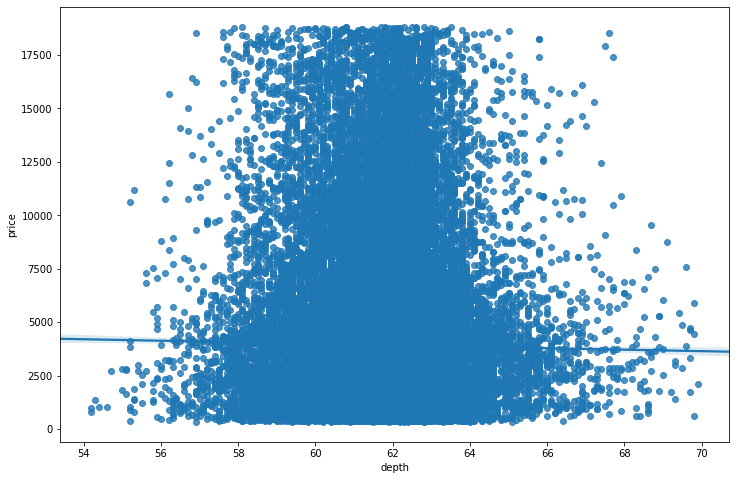

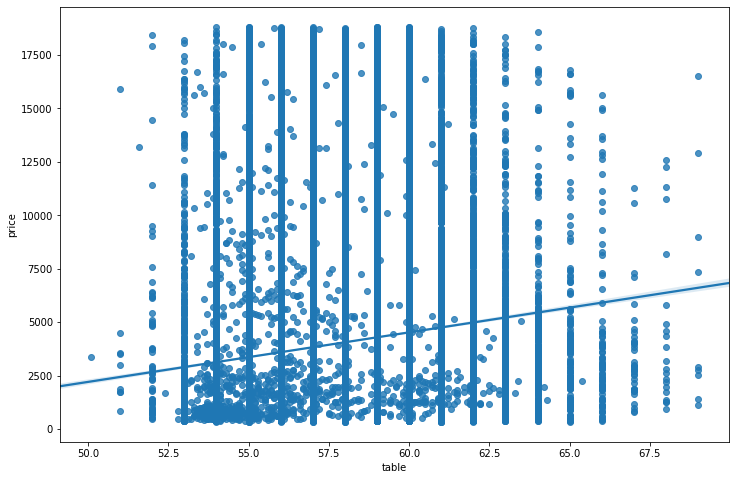

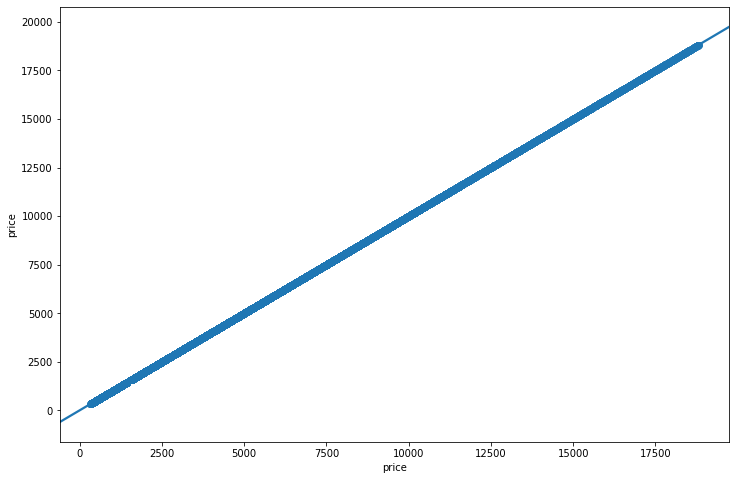

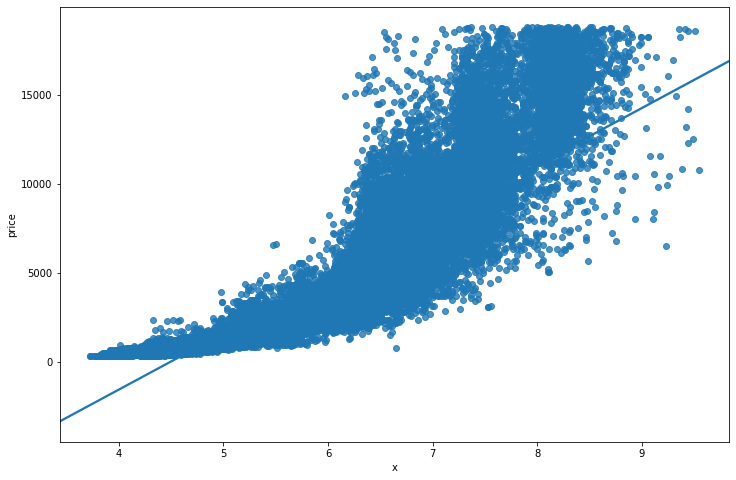

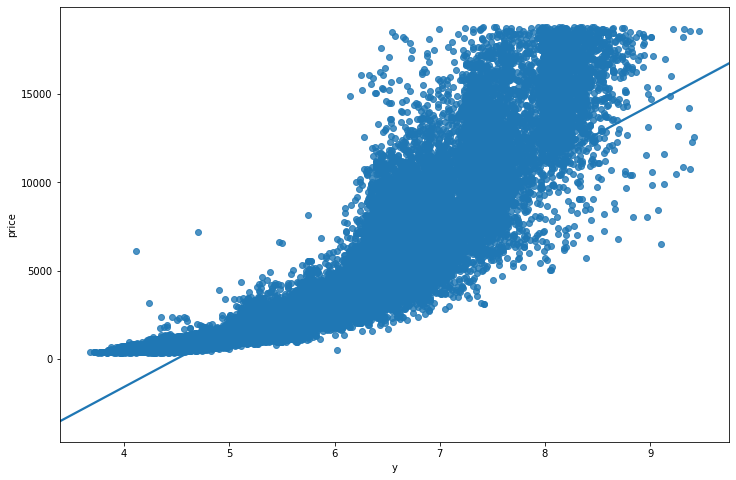

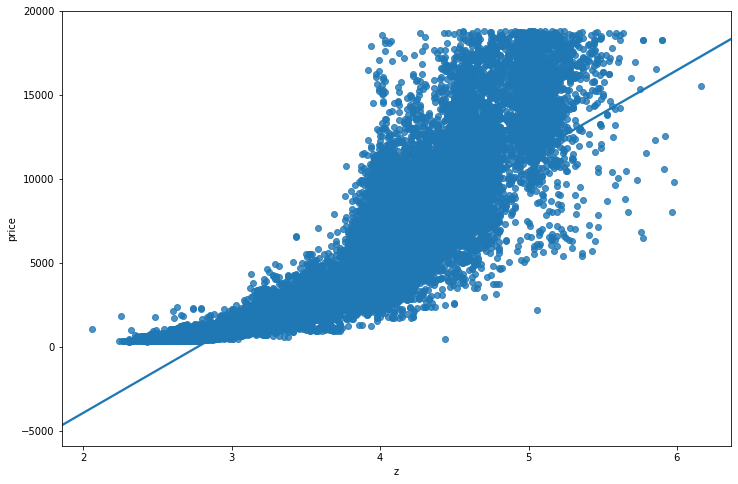

In [15]:
for col in data.select_dtypes(include=[np.number]):
    plt.figure(figsize=(12,8))
    sns.regplot(data=data, x = f'{col}', y=target)

*on peut mieux observer les differentes correlation*
- le prix du diament est proportionnel au nombre de carat, egalement à x, y, z

## Exploration supplementaire des variables numerique
  ### Discretisation des variables

### 1- carat

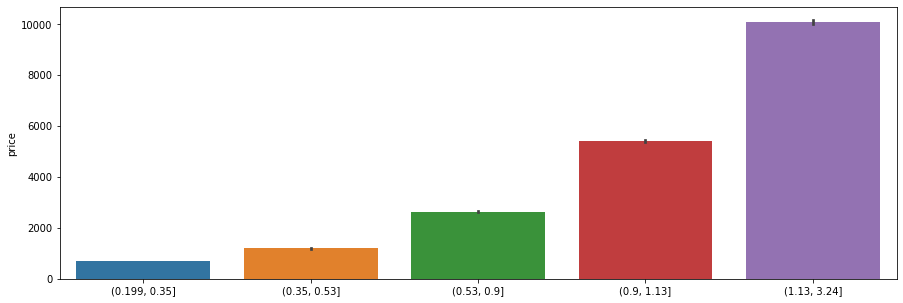

In [7]:
carat_ranges = pd.qcut(data.carat, 5)
plt.figure(figsize=(15, 5))
sns.barplot(x=carat_ranges.values, y=target, data=data)

### le prix du diamant est proportionnel a son nombre de carat
- plus les nombre de carat est élévés plus le prix du diamant augmente

### 2- x (y, z)

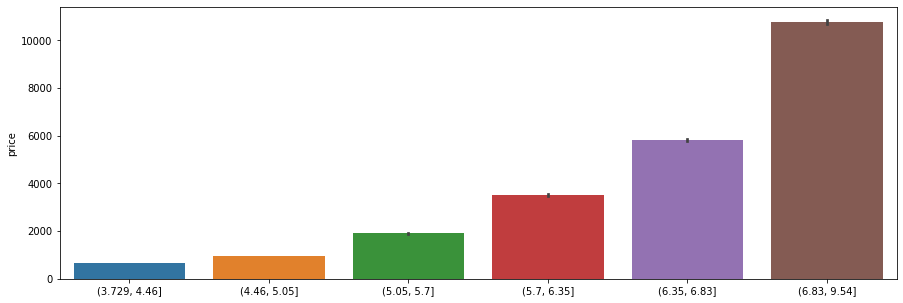

In [99]:
x_ranges = pd.qcut(data.x, 6)
plt.figure(figsize=(15, 5))
sns.barplot(x=x_ranges.values, y=target, data=data)

* tout comme le carat, le prix du diamant est aussi proportinnel à x, y, et z

### 3- Depth

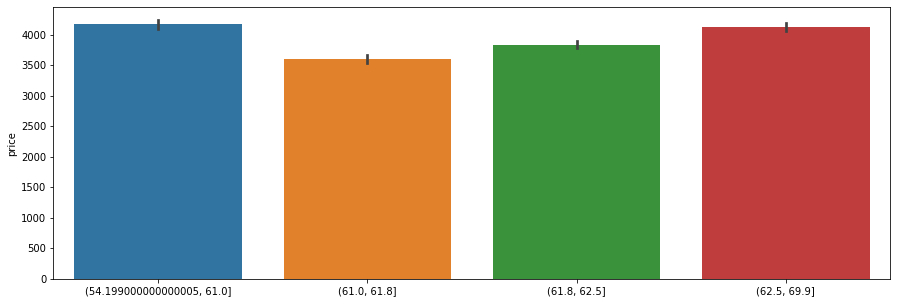

In [156]:
depth_ranges = pd.qcut(data.depth, 4)
plt.figure(figsize=(15, 5))
sns.barplot(x=depth_ranges.values, y=target, data=data)

on constate que la profondeur du diamant n'a pas un impact sur son prix

## Categorical Variables

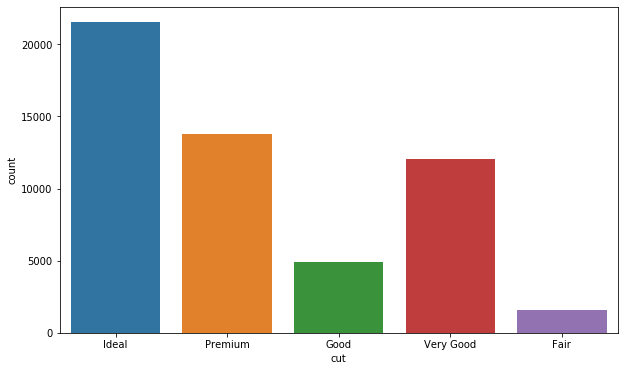

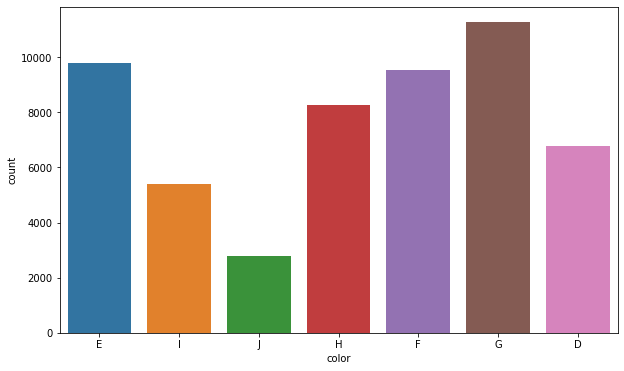

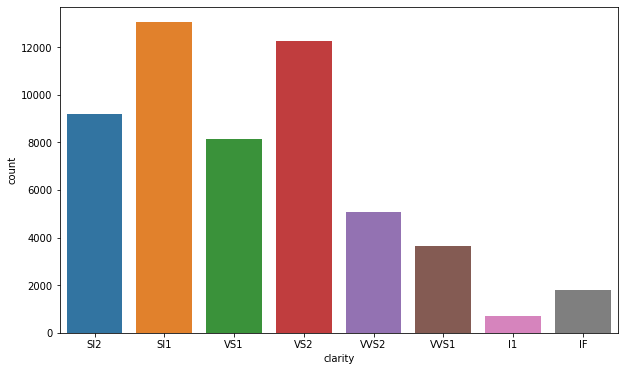

In [23]:
for col in data.select_dtypes(exclude=[np.number]):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=f'{col}')

## 1- Cut

Text(0.5, 1.0, 'cut')

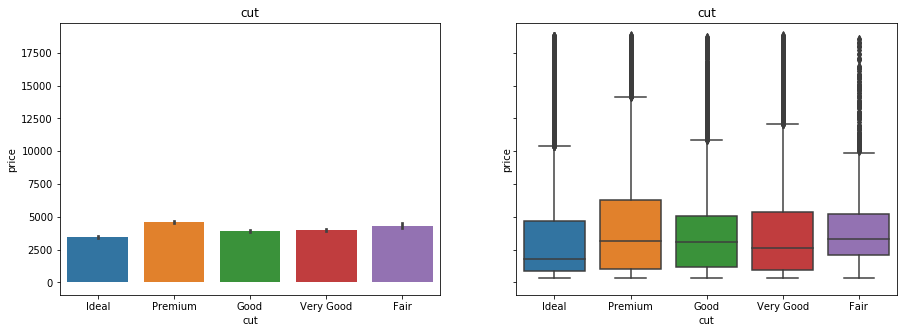

In [27]:
fig, axes = plt.subplots(1,2, figsize=(15,5), sharey=True, sharex=True)
sns.barplot(ax=axes[0], x='cut', y=target, data=data)
axes[0].set_title('cut')
sns.boxplot(ax=axes[1], x='cut', y=target, data=data)
axes[1].set_title('cut')

- on remarque la qualité de coupure n'a pas une tres grande influence sur le prix du diamant
- on remarque aussi la presence de beaucoup de outliers

## 2- Clarity

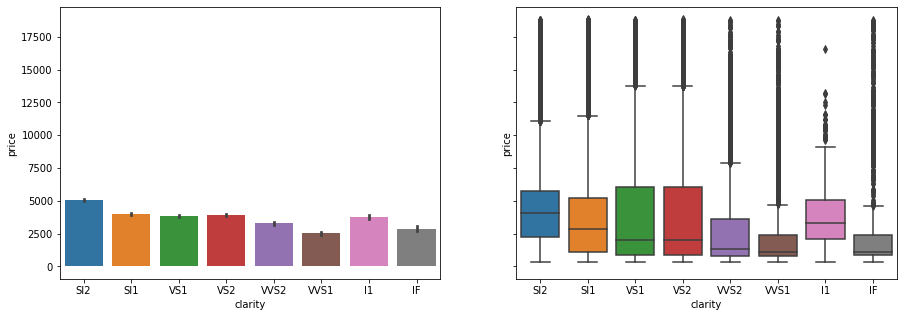

In [28]:
fig, axes = plt.subplots(1,2, figsize=(15,5), sharey=True, sharex=True)
sns.barplot(ax=axes[0], x='clarity', y=target, data=data)
sns.boxplot(ax=axes[1], x='clarity', y=target, data=data)

- 1. le prix du diamant est relativement bas lorsque clarity est à IF, VVS1, VVS2
- 2. la moyenne du prix du diamant augmente legerement pour les autres clarity
- 3. ceci ne donne pas trop d'information sur le prix du diamant

## 3- Color

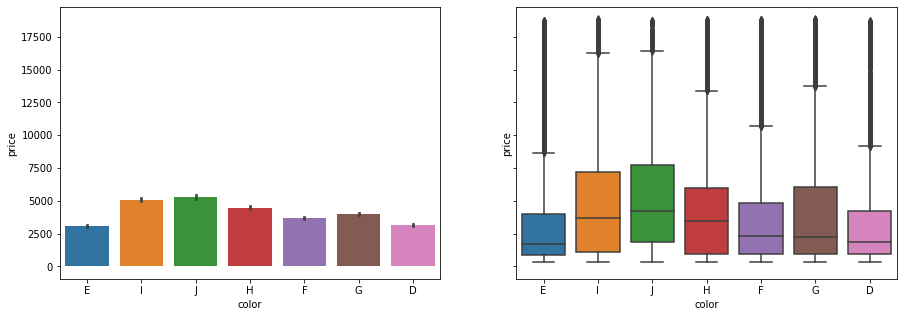

In [29]:
fig, axes = plt.subplots(1,2, figsize=(15,5), sharey=True, sharex=True)
sns.barplot(ax=axes[0], x='color', y=target, data=data)
sns.boxplot(ax=axes[1], x='color', y=target, data=data)

- tout comme pour la variable clarity, cut, la variables color n'est pas assez informartif quant au prix du diamand
- on note tout de meme que le prix du diamant est un peu plus élévé lorsque la couleur les I,J ou H

## distribution de la target variables en fontion des variables catecorielles

In [52]:
def dist_plot(data):
    fig, axes = plt.subplots(1,3,figsize=(20,6), sharex=True)
    i = 0
    for col in data.select_dtypes(exclude=[np.number]):
        for item in data[col].unique():
            sns.distplot(data[data[col] == item]['price'], label=item, ax=axes[i])
        i = i + 1
        plt.legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


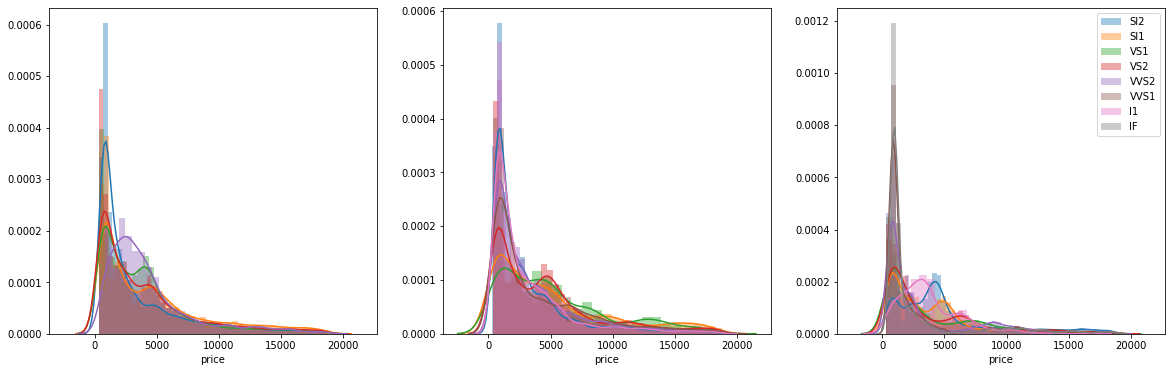

In [53]:
dist_plot(data)

In [84]:
df = data.copy()

In [85]:
corr_matrix = df.corr()

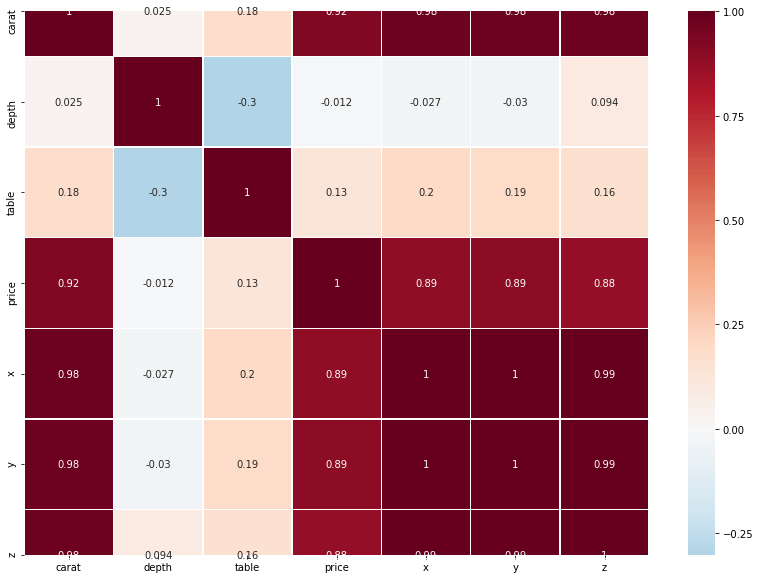

In [86]:
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, cmap='RdBu_r', annot=True, linewidths=0.5, center=0)

- on peut deja voir les intepretation faites pendant l'EDA

# features engeenring

In [73]:
def features_eng(data):
    data['volume'] = data['x'] * data['y'] * data['z']
    data['carat_per_x'] = data['carat'] / data['x']
    
    #data['caratIsHigh'] = data['carat'] == 'C5'
    data.drop(['x', 'y', 'z'], axis=1, inplace=True)
    return data

In [74]:
#df = features_eng(data=df)

In [75]:
#df.head()

carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   

      volume  carat_per_x  
0  38.202030     0.058228  
1  34.505856     0.053985  
2  38.076885     0.056790  
3  46.724580     0.069048  
4  51.917250     0.071429

## Preprocessing

In [50]:
from sklearn.preprocessing import LabelEncoder
def preprocessing(data):
    label_encode = LabelEncoder()
    for col in data.select_dtypes('object'):
        data[col] = label_encode.fit_transform(data[col])
    return data
def encodage(dfp):
    code = {
        'Ideal': 5,
        'Premium': 4,
        'Very Good': 3,
        'Good': 2,
        'Fair': 1
    }
    dfp.loc[:,"cut"] = dfp.loc[:,"cut"].map(code)
    dfp['color']=df['color'].map({'E':1,'D':2,'F':3,'G':4,'H':5,'I':6,'J':7})
    dfp['clarity']=df['clarity'].map({'VVS1':1,'IF':2,'VVS2':3,'VS1':4,'I1':5,'VS2':6,'SI1':7,'SI2':8})
    return dfp
def binarisation(data):
    return pd.get_dummies(data)

In [87]:
df = encodage(df)
df.head()

carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    5      1        8   61.5   55.0    326  3.95  3.98  2.43
1   0.21    4      1        7   59.8   61.0    326  3.89  3.84  2.31
2   0.23    2      1        4   56.9   65.0    327  4.05  4.07  2.31
3   0.29    4      6        6   62.4   58.0    334  4.20  4.23  2.63
4   0.31    2      7        8   63.3   58.0    335  4.34  4.35  2.75

# Model

In [15]:
df.shape

(53843, 26)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, LabelBinarizer, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

In [88]:
#df.drop(['table', 'depth'], axis=1, inplace=True)
X = df.drop(["price"], axis=1)
y = df.price

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## fonction pour calculer le MSE et le RMSE

In [19]:
def mse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    print(f'MSE = {mse}')
    print(f'RMSE = {np.sqrt(mse)}')

## premier model avec une regression lineaire

In [20]:
from sklearn.linear_model import LogisticRegression, SGDRegressor, LinearRegression

In [90]:
model1 = make_pipeline(StandardScaler(), LinearRegression())
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
mse(y_true=y_test, y_pred=y_pred)

MSE = 1565073.7918050147
RMSE = 1251.029093108955


# utilisation des methodes d'ensemble

In [22]:
print(f' Xtrain shape : {X_train.shape}')
print(f' Xtest shape : {X_test.shape}')

 Xtrain shape : (43074, 25)
 Xtest shape : (10769, 25)


In [91]:
numerical_features = X_train.select_dtypes(include=[np.number]).columns
categorical_features = X_train.select_dtypes(exclude=[np.number]).columns

In [68]:
categorical_features

Index([], dtype='object')

In [92]:
numerical_pipeline = make_pipeline(StandardScaler())
categorical_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

In [93]:
transformer = make_column_transformer((numerical_pipeline, numerical_features))

In [40]:
rf_reg = RandomForestRegressor(random_state=0, max_depth=8, max_features=10)
xgb_reg = XGBRegressor(random_state=0)
svm = SVR()

In [41]:
models = {
    "Random Forest": rf_reg,
    "XGBRegressor": xgb_reg
}

Random Forest : [902.27106391 864.02200786 851.0885225  846.5011662  843.87661439]
XGBRegressor : [702.13108501 652.13523731 637.7411461  630.88278756 628.67355833]


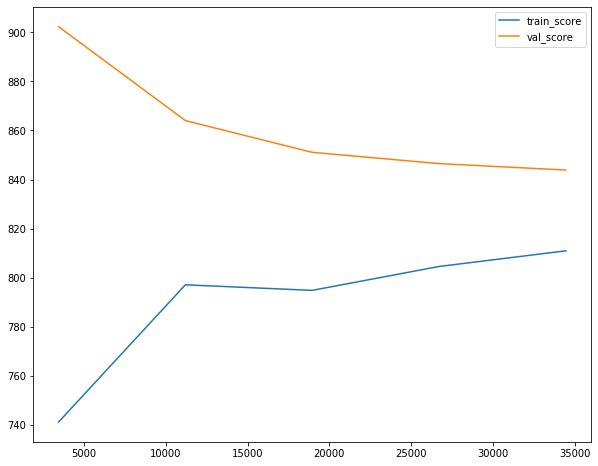

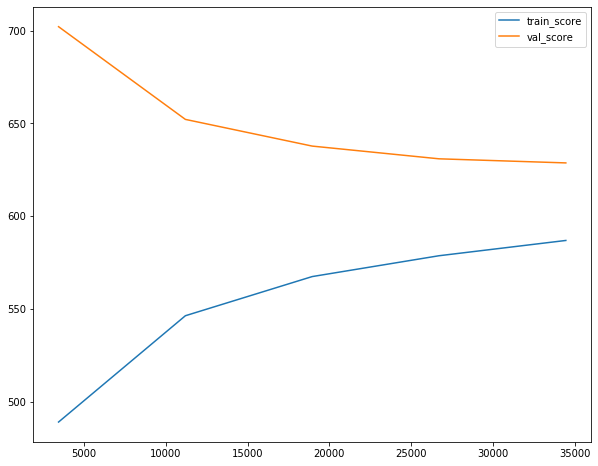

In [42]:
for name,model in models.items():
    m = make_pipeline(transformer, model)
    N, train_score, val_score = learning_curve(m, X_train, y_train, cv=5, scoring='neg_mean_squared_error', error_score='raise')
    print(f'{name} : {np.sqrt(-1 * val_score.mean(axis=1))}')
    plt.figure(figsize=(10,8))
    plt.plot(N, np.sqrt(-1 * train_score.mean(axis=1)), label="train_score")
    plt.plot(N, np.sqrt(-1 * val_score.mean(axis=1)), label= "val_score")
    plt.legend()

le XGBRegressor est beaucoup plus promoteur

# optimisation de XGB Regressor avec GridSearchCV

In [100]:
param_grid = {
        'xgbregressor__n_estimators': [100, 300, 500, 600, 800, 1000],
        'xgbregressor__learning_rate': [0.01, 0.02, 0.05, 0.1],
        'xgbregressor__colsample_bytree': [0.4, 0.45, 0.5],
        'xgbregressor__reg_lambda': [0.6, 0.8, 0.85, 0.9]
}

grid = GridSearchCV(model, param_grid, cv=4, return_train_score=True, scoring="neg_mean_squared_error")

In [101]:
grid.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('pipeline',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('standardscaler',
                                                                                          StandardScaler(copy=True,
                                                                                                         with_mean=True,
      

### Apres Optimisation avec GridSearchCv

In [94]:
xgb_reg = XGBRegressor(random_state=0, colsample_bytree=0.4603,
                             learning_rate=0.05, max_depth=5, 
                             min_child_weight=1.7817, n_estimators=600,
                             reg_alpha=0.6640, reg_lambda=0.8571)
model = make_pipeline(transformer, PolynomialFeatures(degree=2), xgb_reg)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse(y_test, y_pred)

MSE = 265437.5258238659
RMSE = 515.2062944334685


In [109]:
#model.get_params().keys()

# save model

In [96]:
import joblib
joblib.dump(model, "diamonds_price_predict2.pkl")

['diamonds_price_predict2.pkl']

In [97]:
model.predict(X_test[:20])

array([ 2680.8157 ,  1886.6901 ,  1000.4096 , 15201.366  ,   921.598  ,
         491.51477,   714.3102 ,  2926.8547 ,   532.144  ,  2402.8218 ,
        5410.016  ,  4015.8882 ,  5449.3813 ,  3139.3452 ,  8057.3125 ,
         726.9143 ,   813.5018 ,  3425.475  ,  1913.1857 ,   470.72647],
      dtype=float32)

In [133]:
y_test.head(20)

53450     2676
47928     1915
35390      899
26979    17065
37111      969
37593      485
30864      743
1851      3064
52959      552
50450     2264
14878     5991
3168      3337
13975     5690
3241      3354
18888     7745
29748      708
35023      882
4290      3587
48270     1956
34952      471
Name: price, dtype: int64

In [98]:
diamond_price = joblib.load('diamonds_price_predict2.pkl')

In [99]:
diamond_price.predict(X_test[:5])

array([ 2680.8157,  1886.6901,  1000.4096, 15201.366 ,   921.598 ],
      dtype=float32)

In [107]:
X_test.head()

carat  cut  color  clarity  depth  table     x     y     z
53450   0.70    3      4        4   59.2   58.0  5.80  5.83  3.44
47928   0.56    5      1        6   60.9   56.0  5.35  5.32  3.25
35390   0.41    3      4        4   62.3   56.0  4.77  4.80  2.98
26979   2.15    3      5        8   62.8   58.0  8.17  8.22  5.15
37111   0.50    1      6        4   66.9   56.0  4.85  4.81  3.23

In [108]:
y_test[:5]

53450     2676
47928     1915
35390      899
26979    17065
37111      969
Name: price, dtype: int64